In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The objective of the study is to see whether there is any difference in the ages of the smoking and non-smoking mothers. The claim is that the average age of mothers who smoked is less than 
those who did not smoke. Alpha value is 0.05.


Q1) Draw the histograms of the two distributions in the sample, and state your 
inferences.

In [2]:
mothers_df = pd.read_csv('/content/test.csv')
mothers_df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
smoking_mothers = mothers_df[mothers_df["Maternal Smoker"] == True]["Maternal Age"]
non_smoking_mothers = mothers_df[mothers_df["Maternal Smoker"] == False]["Maternal Age"]

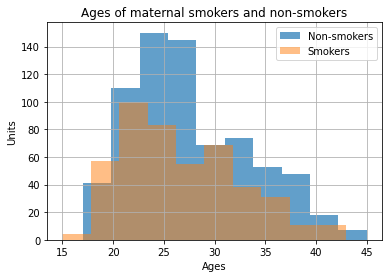

In [4]:
non_smoking_mothers.hist(alpha=0.7, label="Non-smokers")
smoking_mothers.hist(alpha=0.5, label="Smokers")
plt.title("Ages of maternal smokers and non-smokers")
plt.xlabel("Ages")
plt.ylabel("Units")
plt.legend()
plt.show()

We can infer from the above histogram that maternal smokers seem to be younger and also fewer in comparison to maternal non-smokers. This is evident by the skewness of the smokers histogram, which seems to lean more to the left, indicating that maternal smokers are younger in age according to the sample.

Q2) Which statistical test would you employ?

Statistical test that can be employed to verify this claim is A/B testing and Causality. Since the claim is trying to verify if two underlying samples belong to the same population, A/B testing should be used.

Q3) State the null and alternate hypotheses?

Null hypothesis is that there is no difference in the average ages of maternal smokers and maternal non-smokers. Any difference is just due to chance. <br>
Alternate hypothesis is that there is a difference in the average ages of maternal smokers and non-smokers. In other words, average age of mothers who smoked is less than those who did not smoke.

Q4) What statistic do you recommend to apply for this case?

The statistic to be used is the difference between the average ages of mothers who smoke and don't smoke. Since mothers who don't smoke tend to be older according to the histogram, large negative values of this difference will support the alternate hypothesis.

Q5) State the observed statistic.

In [5]:
ages_df = mothers_df[['Maternal Smoker','Maternal Age']]
ages_df

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [6]:
mean_table = ages_df.groupby("Maternal Smoker").mean()
mean_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [7]:
age_diff = mean_table["Maternal Age"][1] - mean_table["Maternal Age"][0]
age_diff

-0.8076725017901509

The observed statistic value is -0.808.

Q6) Simulate the test statistic under the Null that will help make the decision.

To simulate the test statistic value under the null hypothesis, we need to do a random permutation of the ages of the mothers. Since the null hypothesis states that there is no difference in the ages of smoking and non-smoking mothers, we can shuffle the ages of the mothers. This is possible as according to the null hypothesis, the label of maternal smoker being true or false doesn't have any effect on the ages of the mothers. <br>
One simulation of the test statistic under the null hypothesis can be done as follows:

In [8]:
shuffled = ages_df.sample(1174, replace = False)
shuffled

,Maternal Smoker,Maternal Age
241,False,22
58,False,22
791,False,22
769,True,28
37,True,27
...,...,...
652,True,39
445,True,24
991,False,32
610,False,26


In [9]:
shuffled_ages = shuffled["Maternal Age"]
original_and_shuffled = ages_df.assign(shuffled_ages = shuffled_ages.values)
original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_ages
0,False,27,22
1,False,33,22
2,True,28,22
3,True,23,28
4,False,25,27
...,...,...,...
1169,False,27,39
1170,False,24,24
1171,True,30,32
1172,False,21,26


In [10]:
age_difference = original_and_shuffled.groupby("Maternal Smoker")["shuffled_ages"].mean()[1] - original_and_shuffled.groupby("Maternal Smoker")["shuffled_ages"].mean()[0] 
age_difference

-0.5572649572649553

Now we can simulate the same 20000 times.

In [11]:
simulations = 20000
differences = np.zeros(20000)
for i in np.arange(simulations):
  shuffled = ages_df.sample(1174, replace = False)
  shuffled_ages = shuffled["Maternal Age"]
  original_and_shuffled = ages_df.assign(shuffled_ages = shuffled_ages.values)
  age_difference = original_and_shuffled.groupby("Maternal Smoker")["shuffled_ages"].mean()[1] - original_and_shuffled.groupby("Maternal Smoker")["shuffled_ages"].mean()[0]
  differences[i] = age_difference
differences 

array([ 0.02940415,  0.27265719,  0.55883724, ..., -0.13514938,
       -0.33547542,  0.10810366])

In [12]:
diff_df = pd.DataFrame(differences, columns=["Age Differences"])
diff_df

,Age Differences
0,0.029404
1,0.272657
2,0.558837
3,-0.410598
4,0.147453
...,...
19995,-0.195963
19996,-0.314012
19997,-0.135149
19998,-0.335475


The above dataframe represents the simulations of the test statistic under the null.

Q7) Draw a histogram to depict what the model of random selection predicts about the 
statistic.

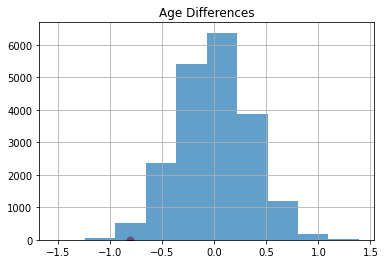

In [13]:
diff_df.hist(alpha=0.7)
plt.scatter(age_diff, 0, s=50, c='r')
plt.show()

Q8) Evaluate the empirical p-value of the test.

As specifed above, large values of the difference in the average ages of the smoking and non-smoking mothers support the alternative hypothesis. Thus, the empirical p-value can be found as follows:

In [16]:
empirical_p = np.count_nonzero(differences <= age_diff)/diff_df.size
print(f'Empirical p-value is {round(empirical_p, 2)*100}%')

Empirical p-value is 1.0%


Q9) What is the outcome of your analysis?

Since the empirical-p value is less than the level of significance or alpha value, we can reject the null hypothesis. So we can say that there is more evidence to support the aternative hypothesis, in other words, ages of maternal smokers tend to be lesser than ages of maternal non-smokers.